# Data Cleaning

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
# Combining datasets in order to add missing last seasons
cleanme = pd.read_csv(r"C:\Users\15127\Springboard\Capstone2\nba-stats-csv\NBA_Stats.csv", header = 0)

In [35]:
#cleaning...
cleanme = cleanme.dropna(how='all')
cleanme.drop('Unnamed: 0',axis = 1,inplace=True)
cleanme.reset_index(drop=True,inplace=True)

In [25]:
# last 10 seasons confirmed
cleanme['SEASON'].value_counts()

2017-18    540
2018-19    530
2019-20    514
2014-15    492
2016-17    486
2013-14    482
2011-12    478
2015-16    476
2012-13    469
2010-11    452
Name: SEASON, dtype: int64

In [36]:
# isolating 2019-2020 season for concatenation to df
cleanme = cleanme[cleanme['SEASON'] == '2019-20']

In [37]:
# matching both dataframes column names
cleanme = cleanme[['PLAYER_ID','SEASON', 'GP','AGE','MIN','FGM','FGA','FG_PCT',
                   'FG3M','FG3A','FG3_PCT','FTM','FTA','FT_PCT','OREB','DREB',
                  'AST', 'TOV','STL','BLK','PTS']]

In [38]:
# lower-casing
cleanme.columns = ['player_id','season_id','gp','age','min','fgm','fga','fg_pct',
                   'fg3m','fg3a','fg3_pct','ftm','fta','ft_pct','oreb','dreb',
                   'ast', 'tov', 'stl','blk','pts']

In [39]:
# read in per game data from csv folder
df = pd.read_csv(r"C:\Users\15127\Springboard\Capstone2\nba-stats-csv\player_general_traditional_per_game_data.csv", header = 0)

In [40]:
# cross-checking column names
df.columns

Index(['player_id', 'season_id', 'gp', 'age', 'min', 'fgm', 'fga', 'fg_pct',
       'fg3m', 'fg3a', 'fg3_pct', 'ftm', 'fta', 'ft_pct', 'oreb', 'dreb',
       'ast', 'tov', 'stl', 'blk', 'pts'],
      dtype='object')

In [41]:
# combining old seasons and new seasons (if you have complete data skip these cells)
all_seasons = pd.concat([df,cleanme],ignore_index=True)

In [42]:
# confirming data...
all_seasons.tail()

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
11142,203897,2019-20,60.0,25.0,34.8,9.0,20.0,0.450,3.1,8.1,...,4.5,5.6,0.802,0.7,4.1,4.2,3.4,1.5,0.5,25.5
11143,1629668,2019-20,5.0,22.0,8.2,0.6,2.4,0.250,0.6,1.6,...,0.2,0.2,1.000,0.0,1.2,0.6,0.6,0.4,0.0,2.0
11144,1629015,2019-20,7.0,21.0,4.6,0.4,1.6,0.273,0.0,0.4,...,0.3,0.6,0.500,0.0,0.3,0.3,0.3,0.4,0.0,1.1
11145,1629627,2019-20,19.0,19.0,29.7,9.1,15.4,0.589,0.3,0.7,...,5.2,8.0,0.645,2.9,3.9,2.2,2.7,0.8,0.5,23.6
11146,1629597,2019-20,3.0,24.0,10.2,0.7,1.7,0.400,0.0,0.3,...,0.0,0.0,0.000,0.3,1.7,0.7,1.0,0.0,0.3,1.3


In [43]:
# renaming
df = all_seasons

In [94]:
# checking all seasons values
df['season_id'].value_counts()

2017-18    463
2018-19    462
2014-15    452
2016-17    444
2019-20    440
2015-16    439
2013-14    439
2012-13    433
2011-12    433
2005-06    428
2006-07    424
2004-05    422
2010-11    421
2007-08    416
2009-10    415
2008-09    409
2001-02    405
1999-00    400
1996-97    399
2002-03    397
2000-01    396
2003-04    396
1997-98    394
1998-99    375
Name: season_id, dtype: int64

In [45]:
# confirming season data...
df.tail(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
11137,1626195,2019-20,31.0,26.0,12.1,2.4,4.5,0.532,0.2,0.7,...,1.2,1.9,0.627,1.4,2.9,0.9,1.0,0.3,0.2,6.1
11138,201163,2019-20,35.0,33.0,21.0,2.1,5.2,0.404,1.1,3.5,...,0.6,0.7,0.870,0.3,3.8,1.1,1.0,0.5,0.3,5.9
11139,1627812,2019-20,44.0,27.0,11.0,1.5,3.8,0.396,0.4,1.6,...,0.7,0.8,0.865,0.1,1.0,1.3,0.6,0.3,0.1,4.2
11140,1629139,2019-20,16.0,25.0,6.2,0.8,1.8,0.414,0.2,0.5,...,0.2,0.5,0.375,0.4,0.7,0.3,0.1,0.3,0.1,1.9
11141,1628380,2019-20,3.0,22.0,28.8,3.0,6.3,0.474,1.0,2.3,...,2.0,2.0,1.000,1.3,2.7,2.0,2.0,0.0,0.7,9.0
11142,203897,2019-20,60.0,25.0,34.8,9.0,20.0,0.450,3.1,8.1,...,4.5,5.6,0.802,0.7,4.1,4.2,3.4,1.5,0.5,25.5
11143,1629668,2019-20,5.0,22.0,8.2,0.6,2.4,0.250,0.6,1.6,...,0.2,0.2,1.000,0.0,1.2,0.6,0.6,0.4,0.0,2.0
11144,1629015,2019-20,7.0,21.0,4.6,0.4,1.6,0.273,0.0,0.4,...,0.3,0.6,0.500,0.0,0.3,0.3,0.3,0.4,0.0,1.1
11145,1629627,2019-20,19.0,19.0,29.7,9.1,15.4,0.589,0.3,0.7,...,5.2,8.0,0.645,2.9,3.9,2.2,2.7,0.8,0.5,23.6
11146,1629597,2019-20,3.0,24.0,10.2,0.7,1.7,0.400,0.0,0.3,...,0.0,0.0,0.000,0.3,1.7,0.7,1.0,0.0,0.3,1.3


In [57]:
# confirming season data...
df.sample(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
67,293,1996-97,19.0,31.0,18.0,1.8,4.4,0.405,0.0,0.1,...,1.1,1.4,0.769,0.9,2.5,0.7,1.2,0.7,1.2,4.6
10348,203087,2018-19,79.0,26.0,28.5,5.5,12.4,0.440,1.5,4.2,...,2.9,3.3,0.888,0.8,4.7,2.2,1.0,1.1,0.4,15.3
3145,2404,2003-04,65.0,21.0,20.6,3.5,6.7,0.521,0.0,0.0,...,1.6,2.3,0.700,1.9,2.8,0.8,1.2,0.4,0.3,8.6
1657,1888,1999-00,71.0,22.0,19.3,3.6,8.5,0.420,0.4,1.1,...,1.5,1.9,0.774,0.5,1.3,1.5,1.2,0.4,0.1,9.0
9539,203898,2016-17,53.0,22.0,11.1,1.7,3.9,0.433,0.5,1.3,...,0.4,0.5,0.840,0.2,0.7,1.6,0.8,0.5,0.0,4.3
4020,2757,2005-06,54.0,23.0,10.9,2.0,4.3,0.455,0.4,1.3,...,0.7,0.9,0.780,0.3,0.6,1.7,1.0,0.3,0.0,5.1
6937,101181,2011-12,53.0,30.0,33.9,4.1,9.0,0.457,1.1,3.0,...,1.1,1.3,0.882,0.4,2.7,8.8,2.0,0.9,0.1,10.5
3731,2823,2004-05,25.0,23.0,5.3,0.4,1.2,0.367,0.0,0.0,...,0.3,0.6,0.500,0.3,0.4,0.1,0.3,0.1,0.2,1.2
5019,1904,2007-08,53.0,30.0,15.5,1.4,3.9,0.357,0.4,1.3,...,0.5,0.6,0.706,0.5,2.1,0.7,0.5,0.4,0.2,3.7
6283,1730,2010-11,2.0,35.0,2.9,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


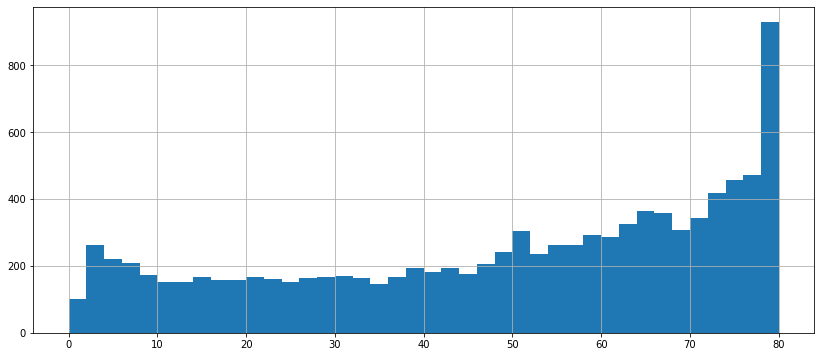

In [50]:
# Histogram that charts games played...
# locating lower bound for outlier cutoff....
bin_values = np.arange(start=0, stop=82, step=2)
df['gp'].hist(bins=bin_values, figsize=[14,6])

In [52]:
#cutting off outliers at 10 games played
min_gp = 10
df_filter = df[df['gp'] > min_gp]

In [53]:
# confirming dropped players
x = df['player_id'].count()
y = df_filter['player_id'].count()
print(x - y)

1045


# Noramlizing Data Across Seasons

In [54]:
# normalize a column
def normalize(col):
    return (col - col.min()) / (col.max() - col.min())

In [55]:
# list of columns to normalize
cols_to_norm = [
    'pts',
    'min',
    'fgm',
    'fga',
    'fg3m',
    'fg3a',
    'ftm',
    'fta',
    'oreb',
    'dreb',
    'ast',
    'stl',
    'tov',
    'blk'
]

In [56]:
# normalizes df column by column
def vorp(df):
    for col_name in cols_to_norm:
        df['{}_norm'.format(col_name)] = normalize(df[col_name])
    return df

In [84]:
# grouping df_filer by 'season_id' and applying normalize function to isolated seasons
df = df_filter.groupby(['season_id']).apply(vorp)
df.sample(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3m_norm,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm
2418,2343,2001-02,21.0,22.0,7.4,1.2,3.2,0.382,0.7,1.9,...,0.212121,0.237500,0.075949,0.056075,0.020000,0.032258,0.101852,0.071429,0.102564,0.000000
1510,1134,1999-00,59.0,30.0,19.8,2.6,6.0,0.429,0.0,0.1,...,0.000000,0.015873,0.213333,0.213592,0.255814,0.343137,0.128713,0.111111,0.435897,0.162162
5511,200826,2008-09,79.0,25.0,20.3,3.1,7.1,0.442,0.7,1.9,...,0.250000,0.271429,0.100000,0.112150,0.116279,0.157895,0.309091,0.178571,0.315789,0.034483
4658,2694,2006-07,37.0,24.0,9.5,1.2,2.5,0.462,0.0,0.0,...,0.000000,0.000000,0.081395,0.096154,0.136364,0.138614,0.051724,0.047619,0.170732,0.090909
2399,2044,2001-02,25.0,24.0,14.5,1.6,3.8,0.432,0.0,0.0,...,0.000000,0.000000,0.126582,0.121495,0.240000,0.204301,0.027778,0.071429,0.102564,0.057143
1618,1710,1999-00,82.0,22.0,38.5,5.6,12.6,0.445,0.9,2.6,...,0.409091,0.412698,0.320000,0.281553,0.209302,0.254902,0.801980,0.592593,0.743590,0.054054
802,197,1997-98,80.0,27.0,13.7,2.0,4.7,0.424,0.6,1.8,...,0.260870,0.305085,0.076923,0.070175,0.147059,0.144330,0.076190,0.307692,0.142857,0.135135
3453,1536,2003-04,80.0,26.0,36.8,6.7,15.8,0.425,1.8,5.3,...,0.600000,0.609195,0.402778,0.366337,0.260870,0.305556,0.336957,0.750000,0.627907,0.083333
7962,101145,2013-14,82.0,28.0,36.9,7.0,15.6,0.451,0.8,2.5,...,0.242424,0.316456,0.471264,0.525253,0.092593,0.308511,0.532710,0.680000,0.837838,0.107143
6881,2037,2011-12,60.0,32.0,26.9,4.7,12.3,0.384,1.3,4.3,...,0.481481,0.623188,0.463768,0.320755,0.068182,0.125000,0.273504,0.360000,0.461538,0.054054


# Distance Function

In [64]:
# function that calucates euclidian distance of two numpy arrays
def calc_distance(u, v):
    dist = np.sqrt(np.sum((u - v)**2))
    return dist

# Find Player Function

In [65]:
# fucntion that finds player in df with 'player_id' and 'player_season'
def find_player(df, player_id, player_season):
    for row in df.itertuples():
        if player_season == row.season_id and player_id == row.player_id:
            return row

In [81]:
# testing fucntion...
player = 204066
season = '2018-19'

In [82]:
#testing fucntion...
find_player(df, player, season)

Pandas(Index=10364, player_id=204066, season_id='2018-19', gp=1.0, age=30.0, min=0.7, fgm=0.0, fga=0.0, fg_pct=0.0, fg3m=0.0, fg3a=0.0, fg3_pct=0.0, ftm=0.0, fta=0.0, ft_pct=0.0, oreb=0.0, dreb=0.0, ast=0.0, tov=0.0, stl=0.0, blk=0.0, pts=0.0, pts_norm=0.0, min_norm=0.0, fgm_norm=0.0, fga_norm=0.0, fg3m_norm=0.0, fg3a_norm=0.0, ftm_norm=0.0, fta_norm=0.0, oreb_norm=0.0, dreb_norm=0.0, ast_norm=0.0, stl_norm=0.0, tov_norm=0.0, blk_norm=0.0)

# Player Comparison Function

In [67]:
# list of season string values used in function
season_list = [
    '1996-97',
    '1997-98',
    '1998-99',
    '1999-00',
    '2000-01',
    '2001-02',
    '2002-03',
    '2003-04',
    '2004-05',
    '2005-06',
    '2006-07',
    '2007-08',
    '2008-09',
    '2009-10',
    '2010-11',
    '2011-12',
    '2012-13',
    '2013-14',
    '2014-15',
    '2015-16',
    '2016-17',
    '2017-18',
    '2018-19',
    '2019-20']

In [68]:
# finds the 10 most similar players for a current_player_id
# by measuring euclidian distance of every other player.
# The top 10 players next seasons are weighted and averaged to find the projection
# and added to final_projections list as a dictionary

def player_comparison_tool(df, current_player_season, current_player_id):
    if (((df['season_id'] == current_player_season) & (df['player_id'] == current_player_id)).any() == False):
        print('Can\'t find player with id {} and season {}'.format(current_player_id, current_player_season))
        return
    for row in df.itertuples():
        if current_player_season == row.season_id and current_player_id == row.player_id:
            current_player_id = row.player_id
            break
      
    current_player_vector = np.array([
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'pts_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'min_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fgm_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fga_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fg3m_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fg3a_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'ftm_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fta_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'oreb_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'dreb_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'ast_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'stl_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'tov_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'blk_norm']).item()
    ])

    print('Projecting player_id {0} for season {1}'.format(current_player_id, season_list[(season_list.index(row.season_id) + 1)]))
    
    player_distance = []
    
    weighted_numbers = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
    
    for row in df.itertuples():
        compared_player_vector = np.array([
        row.pts_norm,
        row.min_norm,
        row.fgm_norm,
        row.fga_norm,
        row.fg3m_norm,
        row.fg3a_norm,
        row.ftm_norm,
        row.fta_norm,
        row.oreb_norm,
        row.dreb_norm,
        row.ast_norm,
        row.stl_norm,
        row.tov_norm,
        row.blk_norm
        ])
        
        vfunc = np.vectorize(calc_distance)
        distance_vect = vfunc(current_player_vector, compared_player_vector)
        weighted_distance = distance_vect * weighted_numbers
        number = np.sum(np.abs(weighted_distance)) / len(distance_vect)
        player_distance.append(number)
    
    df['distance'] = player_distance
    
    ranked_df = df.sort_values('distance')
    
    stats = ['pts',
             'min',
             'fgm',
             'fga',
             'fg3m',
             'fg3a',
             'ftm',
             'fta',
             'oreb',
             'dreb',
             'ast',
             'stl',
             'tov',
             'blk'
             ]
    
    projected_stats = {}
    
    for col in stats:
        sum_stat = 0
        sum_weight = 0
        for index, row in ranked_df.iloc[1:11].iterrows():
            if row.season_id == '2018-19':
                continue
            # get the players next season
            weight = (1 / row.distance)
            next_season = season_list[(season_list.index(row.season_id) + 1)]
            # find the player row with the id and the next season
            player_next_season = find_player(ranked_df, row.player_id, next_season)
            # if player_next_season doesn't exist then skip
            if player_next_season == None:
                continue
            sum_stat += getattr(player_next_season, col) * weight
            sum_weight += weight
        projected_stats['player_id'] = current_player_id
        projected_stats['proj_season_id'] = season_list[(season_list.index(current_player_season) + 1)]
        projected_stats['proj_' + col] = (sum_stat / sum_weight)
        
    return projected_stats




# Projecting 2019-20 Season Stats

In [85]:
# removing season to project
df_final = df[df['season_id'] != '2019-20']

In [86]:
# clearing list
final_projections = []

In [87]:
# selecting season to project
season_to_project = df[df['season_id'] == '2018-19']

In [88]:
# creating list of player_ids for iteration
player_ids_2019 = season_to_project['player_id'].tolist()

In [89]:
player_ids_2019

[203932,
 1628988,
 1627846,
 201143,
 202329,
 202692,
 203518,
 1627936,
 203458,
 1627816,
 1628035,
 1628993,
 203459,
 1629019,
 1628518,
 101161,
 203083,
 2738,
 101106,
 1626150,
 203952,
 1629014,
 1627790,
 203076,
 201229,
 1628469,
 203382,
 203085,
 202340,
 1628389,
 203463,
 1627732,
 202687,
 201933,
 1626246,
 1626171,
 203992,
 202711,
 202954,
 203078,
 1629164,
 1627742,
 202688,
 1629102,
 201572,
 1628971,
 203998,
 1627854,
 1627741,
 203710,
 203468,
 101139,
 1628403,
 1626166,
 1629244,
 1627747,
 1626224,
 1628990,
 202718,
 101112,
 1626184,
 1627767,
 1629002,
 1628449,
 101108,
 1626174,
 203991,
 203469,
 1629012,
 201147,
 202709,
 201584,
 1626245,
 1626156,
 201571,
 1628391,
 1629541,
 1627745,
 203081,
 1627814,
 1628422,
 1627772,
 1628464,
 201568,
 201980,
 201967,
 203957,
 1627863,
 203967,
 203121,
 201954,
 1628021,
 202722,
 1628368,
 1629001,
 201599,
 1627761,
 201942,
 202326,
 201960,
 1629028,
 1626153,
 1629061,
 203471,
 1628372,
 1629

In [90]:
# loops through player_id list and runs player_comparison function
# on every player using the df_final dataframe and adds the returned
# dictionary to final_projections

for player in player_ids_2019:
    current_player_id = player
    current_player_season = '2018-19'
    projections = player_comparison_tool(df_final, current_player_season, current_player_id)
    if (projections == None):
        continue
    final_projections.append(projections)

Projecting player_id 203932 for season 2019-20


C:\Users\15127\anaconda3\lib\site-packages\ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Projecting player_id 1628988 for season 2019-20
Projecting player_id 1627846 for season 2019-20
Projecting player_id 201143 for season 2019-20
Projecting player_id 202329 for season 2019-20
Projecting player_id 202692 for season 2019-20
Projecting player_id 203518 for season 2019-20
Projecting player_id 1627936 for season 2019-20
Projecting player_id 203458 for season 2019-20
Projecting player_id 1627816 for season 2019-20
Projecting player_id 1628035 for season 2019-20
Projecting player_id 1628993 for season 2019-20
Projecting player_id 203459 for season 2019-20
Projecting player_id 1629019 for season 2019-20
Projecting player_id 1628518 for season 2019-20
Projecting player_id 101161 for season 2019-20
Projecting player_id 203083 for season 2019-20
Projecting player_id 2738 for season 2019-20
Projecting player_id 101106 for season 2019-20
Projecting player_id 1626150 for season 2019-20
Projecting player_id 203952 for season 2019-20
Projecting player_id 1629014 for season 2019-20
Proje

Projecting player_id 1628392 for season 2019-20
Projecting player_id 202738 for season 2019-20
Projecting player_id 202397 for season 2019-20
Projecting player_id 1628397 for season 2019-20
Projecting player_id 1627826 for season 2019-20
Projecting player_id 200826 for season 2019-20
Projecting player_id 200755 for season 2019-20
Projecting player_id 2747 for season 2019-20
Projecting player_id 203210 for season 2019-20
Projecting player_id 201580 for season 2019-20
Projecting player_id 203953 for season 2019-20
Projecting player_id 1628980 for season 2019-20
Projecting player_id 203109 for season 2019-20
Projecting player_id 1626143 for season 2019-20
Projecting player_id 1627774 for season 2019-20
Projecting player_id 1627751 for season 2019-20
Projecting player_id 1628973 for season 2019-20
Projecting player_id 1627883 for season 2019-20
Projecting player_id 2037 for season 2019-20
Projecting player_id 1627750 for season 2019-20
Projecting player_id 203516 for season 2019-20
Project

Projecting player_id 1629016 for season 2019-20
Projecting player_id 201956 for season 2019-20
Projecting player_id 203490 for season 2019-20
Projecting player_id 200782 for season 2019-20
Projecting player_id 1627783 for season 2019-20
Projecting player_id 1626192 for season 2019-20
Projecting player_id 201976 for season 2019-20
Projecting player_id 1627775 for season 2019-20
Projecting player_id 202335 for season 2019-20
Projecting player_id 201988 for season 2019-20
Projecting player_id 2200 for season 2019-20
Projecting player_id 202331 for season 2019-20
Projecting player_id 200794 for season 2019-20
Projecting player_id 202347 for season 2019-20
Projecting player_id 1626188 for season 2019-20
Projecting player_id 200765 for season 2019-20
Projecting player_id 203526 for season 2019-20
Projecting player_id 1629034 for season 2019-20
Projecting player_id 101109 for season 2019-20
Projecting player_id 203493 for season 2019-20
Projecting player_id 202704 for season 2019-20
Projectin

In [91]:
# saving 2019-20 final_projections to csv 

pd.DataFrame(final_projections).to_csv('proj_2019.csv')